Osnabrück University - Computer Vision (Winter Term 2020/21) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Ludwig Schallner, Artem Petrov

# Exercise Sheet 8: Compression

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, January 09, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Redundancy and compression [4 Points]


**a)** Explain in your own words the different types of redundancy mentioned on (CV-10 slide 3). How can you check for each of these types of redundancy?

Coding redundancy occurs when an encoding is able to represent more information than it has to represent. Thus, the used encoding covers more codes than necessary, so it is "overpowered" for that particular usecase.

Interpixel redundancy occurs when neighboring pixels have the same gray/ color value. So there is potential for compression by combining these larger pixel areas of the same gray/ color value and encoding them as a single entity. 

Psychovisual redundancy describes the effect that an image contains more information than the human eye ia able to recognize. Hence, some information can be removed due to compression reasons without disturbance of the human's eye perception.  

**b)** Explain the differences between lossless and lossy compression. Name examples for both of them. Sketch application scenarios.

A lossless compression compresses data in a way that keeps all information given in the original image. -> e.g. Huffman Decoding, Run Length Encoding, Gray code

A lossy compression compresses an image by removing some of the information given in the original image. 

## Assignment 2: Entropy based compression [8 Points]


**a)** Explain the idea of Huffman coding. What is the maximal compression factor that can be achieved for a given image? Load an image and compute that value (you may use `dolly.png` as an example. Make sure to load as 8-bit gray scale image).

The idea of Huffman coding is to encode the different gray values of an image according to their frequency. Thus, the gray values with the most frequent occurence are encoded with the smallest codes. 

Maximum compression factor: n_bits / entropy

In [1]:
import numpy as np
import math
import imageio
import matplotlib.pyplot as plt

#img = imageio.imread('images/dolly.png', pilmode='L')
img = imageio.imread('images/maze2.png', pilmode='L')

# YOUR CODE HERE
def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.
    
    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # YOUR CODE HERE
    n_gray_values = 256
    frequency_each_gray_value = np.zeros(n_gray_values)  #saves the frequency of each gray value in the image (index = corresponding gray value)
    for img_row in range(img.shape[0]):
        for img_col in range(img.shape[1]):
            #Increments the count in the frequency array at the index which fits the current gray value of the image.
            frequency_each_gray_value[img[img_row][img_col]] += 1    
            
    #Computes the probability of each gray value -> "Normalization"
    probability_each_gray_value = frequency_each_gray_value / (img.shape[0] * img.shape[1])
    
    entropy = 0
    base = 2   #base of log
    for gray_value in probability_each_gray_value:   #range for. Only applicable if the array, over which iteration is performed, is not edited. Because range-for works on a copy of the original array, so changes to the array are not saved. 
        #log is only defined for values larger than 0
        entropy += gray_value * math.log(gray_value if gray_value > 0 else 1, base)
    
    return (entropy * (-1))

n_bits = 8
maximum_compression_factor = n_bits / entropy(img)

print("Entropy: " + str(entropy(img)))
print("Maximum compression factor: " + str(maximum_compression_factor))

Entropy: 0.9988455359952018
Maximum compression factor: 8.009246386658958


**b)** Now compute the relative frequencies (normalized histogram) of the image and generate an (approximately) balanced tree, as described in (CV-10 slide 6). *Hint:* you may use Python tuples as building blocks of a tree. Every non-leaf node is a pair `(left, right)` where `left` and `right` are the left and right subtrees, respectively (of course you are free to choose another approach if you prefer to do so).

In [2]:
from collections import namedtuple
from sortedcontainers import SortedList  

Node = namedtuple('Node', ['frequency', 'subtree'])

img = imageio.imread('images/dolly.png', pilmode='L')

occurences = np.zeros(256, dtype=np.int32)
for img_row in range(img.shape[0]):
    for img_col in range(img.shape[1]):
        occurences[img[img_row][img_col]] += 1
#print(occurences)

n_pixels = img.shape[0] * img.shape[1]
normed_hist_img = np.zeros_like(occurences, dtype=np.float32)
for i in range(len(occurences)):
    normed_hist_img[i] = (occurences[i] / n_pixels)      # normalized histogram
#print(normed_hist_img)

# nodes is a sorted list of sub-trees, each annotated by its cummulative relative frequency,
# i.e. each list item is a pair (frequency, subtree)
# lowest frequencies come first
nodes = SortedList(
    [Node(frequency, i) for i, frequency in enumerate(normed_hist_img)],
    key=lambda x: x.frequency)

current_least_likely_value = 0
tree = []
for i in range(len(nodes)-1):
    current_least_likely_value += nodes[i][0]
    current_non_leaf_node = (current_least_likely_value, nodes[i+1][0])
    tree.append(current_non_leaf_node)
    print(current_non_leaf_node)

print(tree)

(0.0, 0.0)
(0.0, 8.333333e-06)
(8.333333425980527e-06, 1.6666667e-05)
(2.500000027794158e-05, 2.7083333e-05)
(5.208333368500462e-05, 2.9166667e-05)
(8.125000113068381e-05, 2.9166667e-05)
(0.00011041666857636301, 3.5416666e-05)
(0.00014583333449991187, 3.5416666e-05)
(0.00018125000042346073, 4.375e-05)
(0.00022499999886349542, 4.5833334e-05)
(0.00027083333316113567, 4.5833334e-05)
(0.0003166666674587759, 4.5833334e-05)
(0.00036250000175641617, 6.875e-05)
(0.00043125000138388714, 0.00013541666)
(0.0005666666611432447, 0.00014166666)
(0.0007083333248374402, 0.00015416667)
(0.0008624999964013114, 0.00017916667)
(0.0010416666691526189, 0.00018958333)
(0.0012312499957261025, 0.0002125)
(0.0014437499985433533, 0.00027916668)
(0.001722916676044406, 0.00039791668)
(0.002120833355547802, 0.000425)
(0.0025458333611823036, 0.00052291667)
(0.003068750032070966, 0.00054166664)
(0.0036104166711083963, 0.00071041664)
(0.004320833314523043, 0.0007166667)
(0.005037500005528273, 0.00073125)
(0.0057687499

**c)** Now create a prefix free code from this tree, by traversing it following the idea sketched in (CV-10 slide 7). *Hint:* if you used the tuple representation recommended in (b), you can use `isinstance(node, tuple)` to check if `node` is an inner node or a leaf.

In [3]:
# function to recursively traverse the tree.
# For every inner node assign prefix "0" to the left subtree
# and prefix "1" to the right subtree.
def assign_codes(tree):
    size_of_tree = len(tree)
    size_of_tree -= 1
    codes = []
    current_code = []
    for node in range(len(tree)):
        if node < 2:
            current_code.append(0)
            (_, current_probability) = tree[size_of_tree - node]
            current_pair = (current_code, current_probability)
            codes.append(current_pair)
            print(current_pair)
        elif node >= 2 and node < 4:
            del current_code[-1]
            current_code.append(1)
            current_code.append(0)
            (_, current_probability) = tree[size_of_tree - node]
            current_pair = (current_code, current_probability)     
            codes.append(current_pair)   
            print(current_pair)
        elif node >= 4 and node < 7:
            current_code.append(0)
            (_, current_probability) = tree[size_of_tree - node]
            current_pair = (current_code, current_probability)
            codes.append(current_pair) 
            print(current_pair)
    return codes
        
print(assign_codes(tree))

([0], 0.015889583)
([0, 0], 0.0139833335)
([0, 1, 0], 0.012075)
([0, 1, 1, 0], 0.011860416)
([0, 1, 1, 0, 0], 0.01185)
([0, 1, 1, 0, 0, 0], 0.011633334)
([0, 1, 1, 0, 0, 0, 0], 0.0111041665)
[([0, 1, 1, 0, 0, 0, 0], 0.015889583), ([0, 1, 1, 0, 0, 0, 0], 0.0139833335), ([0, 1, 1, 0, 0, 0, 0], 0.012075), ([0, 1, 1, 0, 0, 0, 0], 0.011860416), ([0, 1, 1, 0, 0, 0, 0], 0.01185), ([0, 1, 1, 0, 0, 0, 0], 0.011633334), ([0, 1, 1, 0, 0, 0, 0], 0.0111041665)]


**d)** Compute the compression ratio that you can achieve with that code. Compare this with the maximal value computed in part (a). Explain your observation.

In [4]:
acc = 0
for value, code in enumerate(codes):
    # YOUR CODE HERE

print("{:.2f} bits per pixel".format(acc))

IndentationError: expected an indented block (<ipython-input-4-8a0a9ed2d708>, line 5)

YOUR ANSWER HERE

## Assignment 3: Run length encoding [8 Points]


**a)** Explain the idea of *run length encoding*. What are advantages and disadvantages? In what situations should it be applied?

Run Length Encoding (RLE) combines and encodes neighboring pixels as one segment if they have the identical gray/ color value. The encoding is conducted line by line. The segments are encoded in the form (number, value), so in the worst case, if there are no segments with same gray/ color values, the amount of data is doubled.

**b)** Analyze the run lengths in a gray scale image (8 bit = 256 gray values) by counting the number of runs and the average run length and displaying a histogram of the run lengths. What do you observe? Can you benefit from run length encoding here? (you may use `dolly.png` as an example again, but you may also experiment with other images. Make sure to load it as 8-bit gray scale image).

(7549, 2)


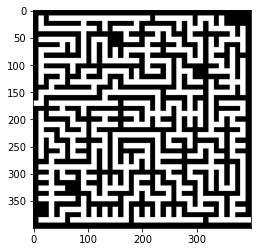

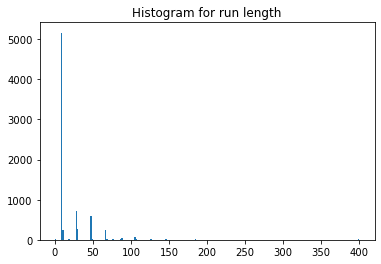

In [5]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

#img = imageio.imread('images/dolly.png', pilmode='L')

img = imageio.imread('images/maze2.png', pilmode='L')



def run_length_func(img):
    
    img_row=0
    img_col=0
    for_hist=0
    run_length=[[0,0]]
    i=0
    j=0

    for img_row in range(img.shape[0]):
        active_val=img[img_row][img_col]
        i=0
        j=0
        for img_col in range(img.shape[1]):
            if active_val==img[img_row][img_col]:
                i+=1
                #print(i)
            else:
                run_length=np.append(run_length,[[i,active_val]],axis=0)
                for_hist=np.append(for_hist,i)
                i=0
                active_val=img[img_row][img_col]
            
            if j==img.shape[1]-1:
                run_length=np.append(run_length,[[i,active_val]],axis=0)
                for_hist=np.append(for_hist,i)
           
            #print(j)
            j+=1
    return run_length,for_hist



run_length,for_hist=run_length_func(img)

#print(run_length)

print(run_length.shape)

plt.gray()
plt.imshow(img)
plt.show()


plt.hist(for_hist, bins='auto')  
plt.title("Histogram for run length")
plt.show()
     
            


For the chosen example here we can defenetly benfit from run length encoding -> Cut down storage from 160000 byte to 15098 byte.

**c)** Now consider the individual bit planes. First display the bit planes as in (CV-10 slide 10ff). What do you observe? Apply your analysis from part (b) to each bitplane.

<Figure size 432x288 with 0 Axes>

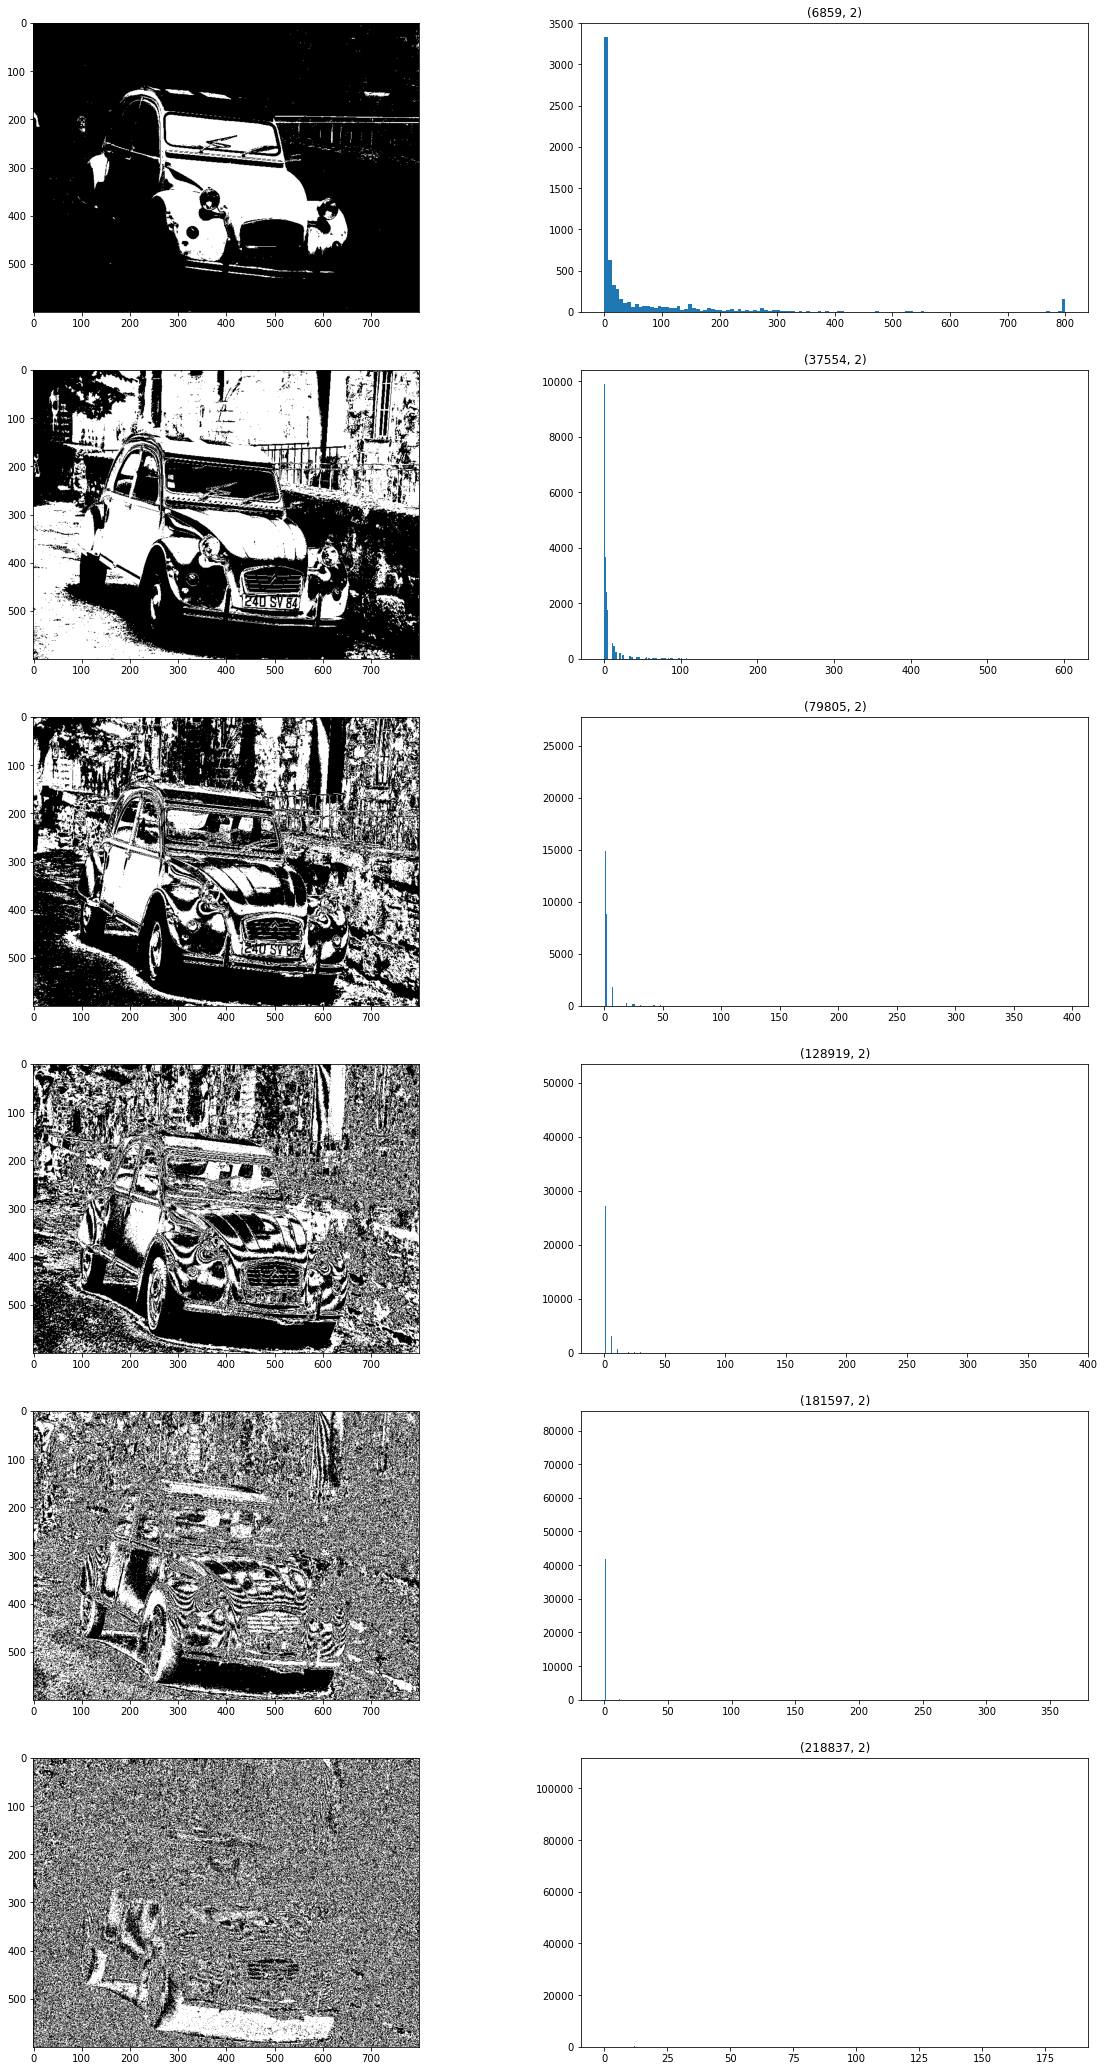

In [7]:
import numpy as np
import imageio
import matplotlib.pyplot as plt


img = imageio.imread('images/dolly.png', pilmode='L')
#img = imageio.imread('images/maze2.png', pilmode='L')

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

#Go through list, choose one of the eight bits from each list element, convert to int, multiply by equivalent bit value and store to new list.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128)
#reshape new list to original image shape
eight_bit_img = eight_bit_img.reshape(img.shape[0],img.shape[1])

seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64)
seven_bit_img = seven_bit_img.reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32)
six_bit_img = six_bit_img.reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16)
five_bit_img = five_bit_img.reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8)
four_bit_img = four_bit_img.reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4)
three_bit_img = three_bit_img.reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2)
two_bit_img = two_bit_img.reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1)
one_bit_img = one_bit_img.reshape(img.shape[0],img.shape[1])

run_length_8,for_hist_8=run_length_func(eight_bit_img)
run_length_7,for_hist_7=run_length_func(seven_bit_img)
run_length_6,for_hist_6=run_length_func(six_bit_img)
run_length_5,for_hist_5=run_length_func(five_bit_img)
run_length_4,for_hist_4=run_length_func(four_bit_img)
run_length_3,for_hist_3=run_length_func(three_bit_img)
#run_length_2,for_hist_2=run_length_func(two_bit_img)
#run_length_1,for_hist_1=run_length_func(one_bit_img)

plt.gray()
plt.figure(figsize=(20, 50))

plt.subplot(8,2,1)
plt.imshow(eight_bit_img)
plt.subplot(8,2,2)
plt.hist(for_hist_8, bins='auto')  
plt.title(run_length_8.shape)

plt.subplot(8,2,3)
plt.imshow(seven_bit_img)
plt.subplot(8,2,4)
plt.hist(for_hist_7, bins='auto')  
plt.title(run_length_7.shape)

plt.subplot(8,2,5)
plt.imshow(six_bit_img)
plt.subplot(8,2,6)
plt.hist(for_hist_6, bins='auto')  
plt.title(run_length_6.shape)

plt.subplot(8,2,7)
plt.imshow(five_bit_img)
plt.subplot(8,2,8)
plt.hist(for_hist_5, bins='auto')  
plt.title(run_length_5.shape)

plt.subplot(8,2,9)
plt.imshow(four_bit_img)
plt.subplot(8,2,10)
plt.hist(for_hist_4, bins='auto')  
plt.title(run_length_4.shape)

plt.subplot(8,2,11)
plt.imshow(three_bit_img)
plt.subplot(8,2,12)
plt.hist(for_hist_3, bins='auto')  
plt.title(run_length_3.shape)

plt.show()




The MSB give us the best compression, but in the same manner a greater data loss. 

**d)** Explain the idea of the *Gray code*. Why is it better suited for run length encoding? Compute a Gray code for a 256 bit image and recode the image `dolly.png`. Then analyze the run lengths of the individual bit planes of the recoded image.

In Gray code two successive numbers differ by one bit at most. 

In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

img = imageio.imread('images/dolly.png', pilmode='L')

# YOUR CODE HERE